In [4]:
from caveclient import CAVEclient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tqdm

from standard_transform.datasets import minnie_ds

In [5]:
from matplotlib import rcParams

# Use editable fonts
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

# Set default typeface to Helvetica
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

In [6]:
layer_bounds = np.load('layer_bounds_v3.npy')
height_bounds = np.load('height_bounds_v1.npy')
height_bounds = height_bounds-height_bounds[0]
height_bounds[1] = 760

In [7]:
client = CAVEclient('minnie65_public')
client.version = 1181

pf_df = client.materialize.tables.proofreading_status_and_strategy.get_all()

In [8]:
good_axons = ['axon_partially_extended', 'axon_fully_extended', 'axon_interareal']
root_ids = pf_df.query('strategy_axon in @good_axons')['pt_root_id']

In [ ]:
ct_df = client.materialize.tables.aibs_metamodel_mtypes_v661_v2().query(desired_resolution=[1,1,1])
ct_df = ct_df.drop_duplicates('pt_root_id', keep=False)
ct_df['soma_depth'] = minnie_ds.transform_nm.apply_dataframe('pt_position', ct_df, projection='y')

In [10]:
all_cells = ct_df['pt_root_id'].values

#### Code that generated the edgelist:

```python

syn_dfs = []
for rids_target in tqdm.tqdm(np.array_split(root_ids, 18)):
    temp_df = client.materialize.synapse_query(pre_ids=rids_target)
    syn_dfs.append( temp_df.query('post_pt_root_id in @all_cells') )
syn_df = pd.concat(syn_dfs, ignore_index=True)
edgelist = syn_df.groupby(['pre_pt_root_id', 'post_pt_root_id']).id.count().reset_index().rename(columns={'id': 'num_syn'})

edgelist_typed = edgelist.merge(
    ct_df[['pt_root_id','cell_type','classification_system', 'soma_depth']].rename(
        columns={"cell_type":  "cell_type_post", "classification_system": "valence_post", "soma_depth":"soma_depth_post"}
    ),
    left_on='post_pt_root_id',
    right_on="pt_root_id",
).drop(columns='pt_root_id').merge(
    ct_df[['pt_root_id','cell_type','classification_system', 'soma_depth']].rename(
        columns={"cell_type":  "cell_type_pre", "classification_system": "valence_pre", "soma_depth": "soma_depth_pre"}
    ),
    left_on='pre_pt_root_id',
    right_on="pt_root_id",
).drop(columns='pt_root_id')

edgelist_typed.to_csv('edgelist.csv', index=False)
```

In [12]:
edgelist_typed = pd.read_csv('edgelist.csv')


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


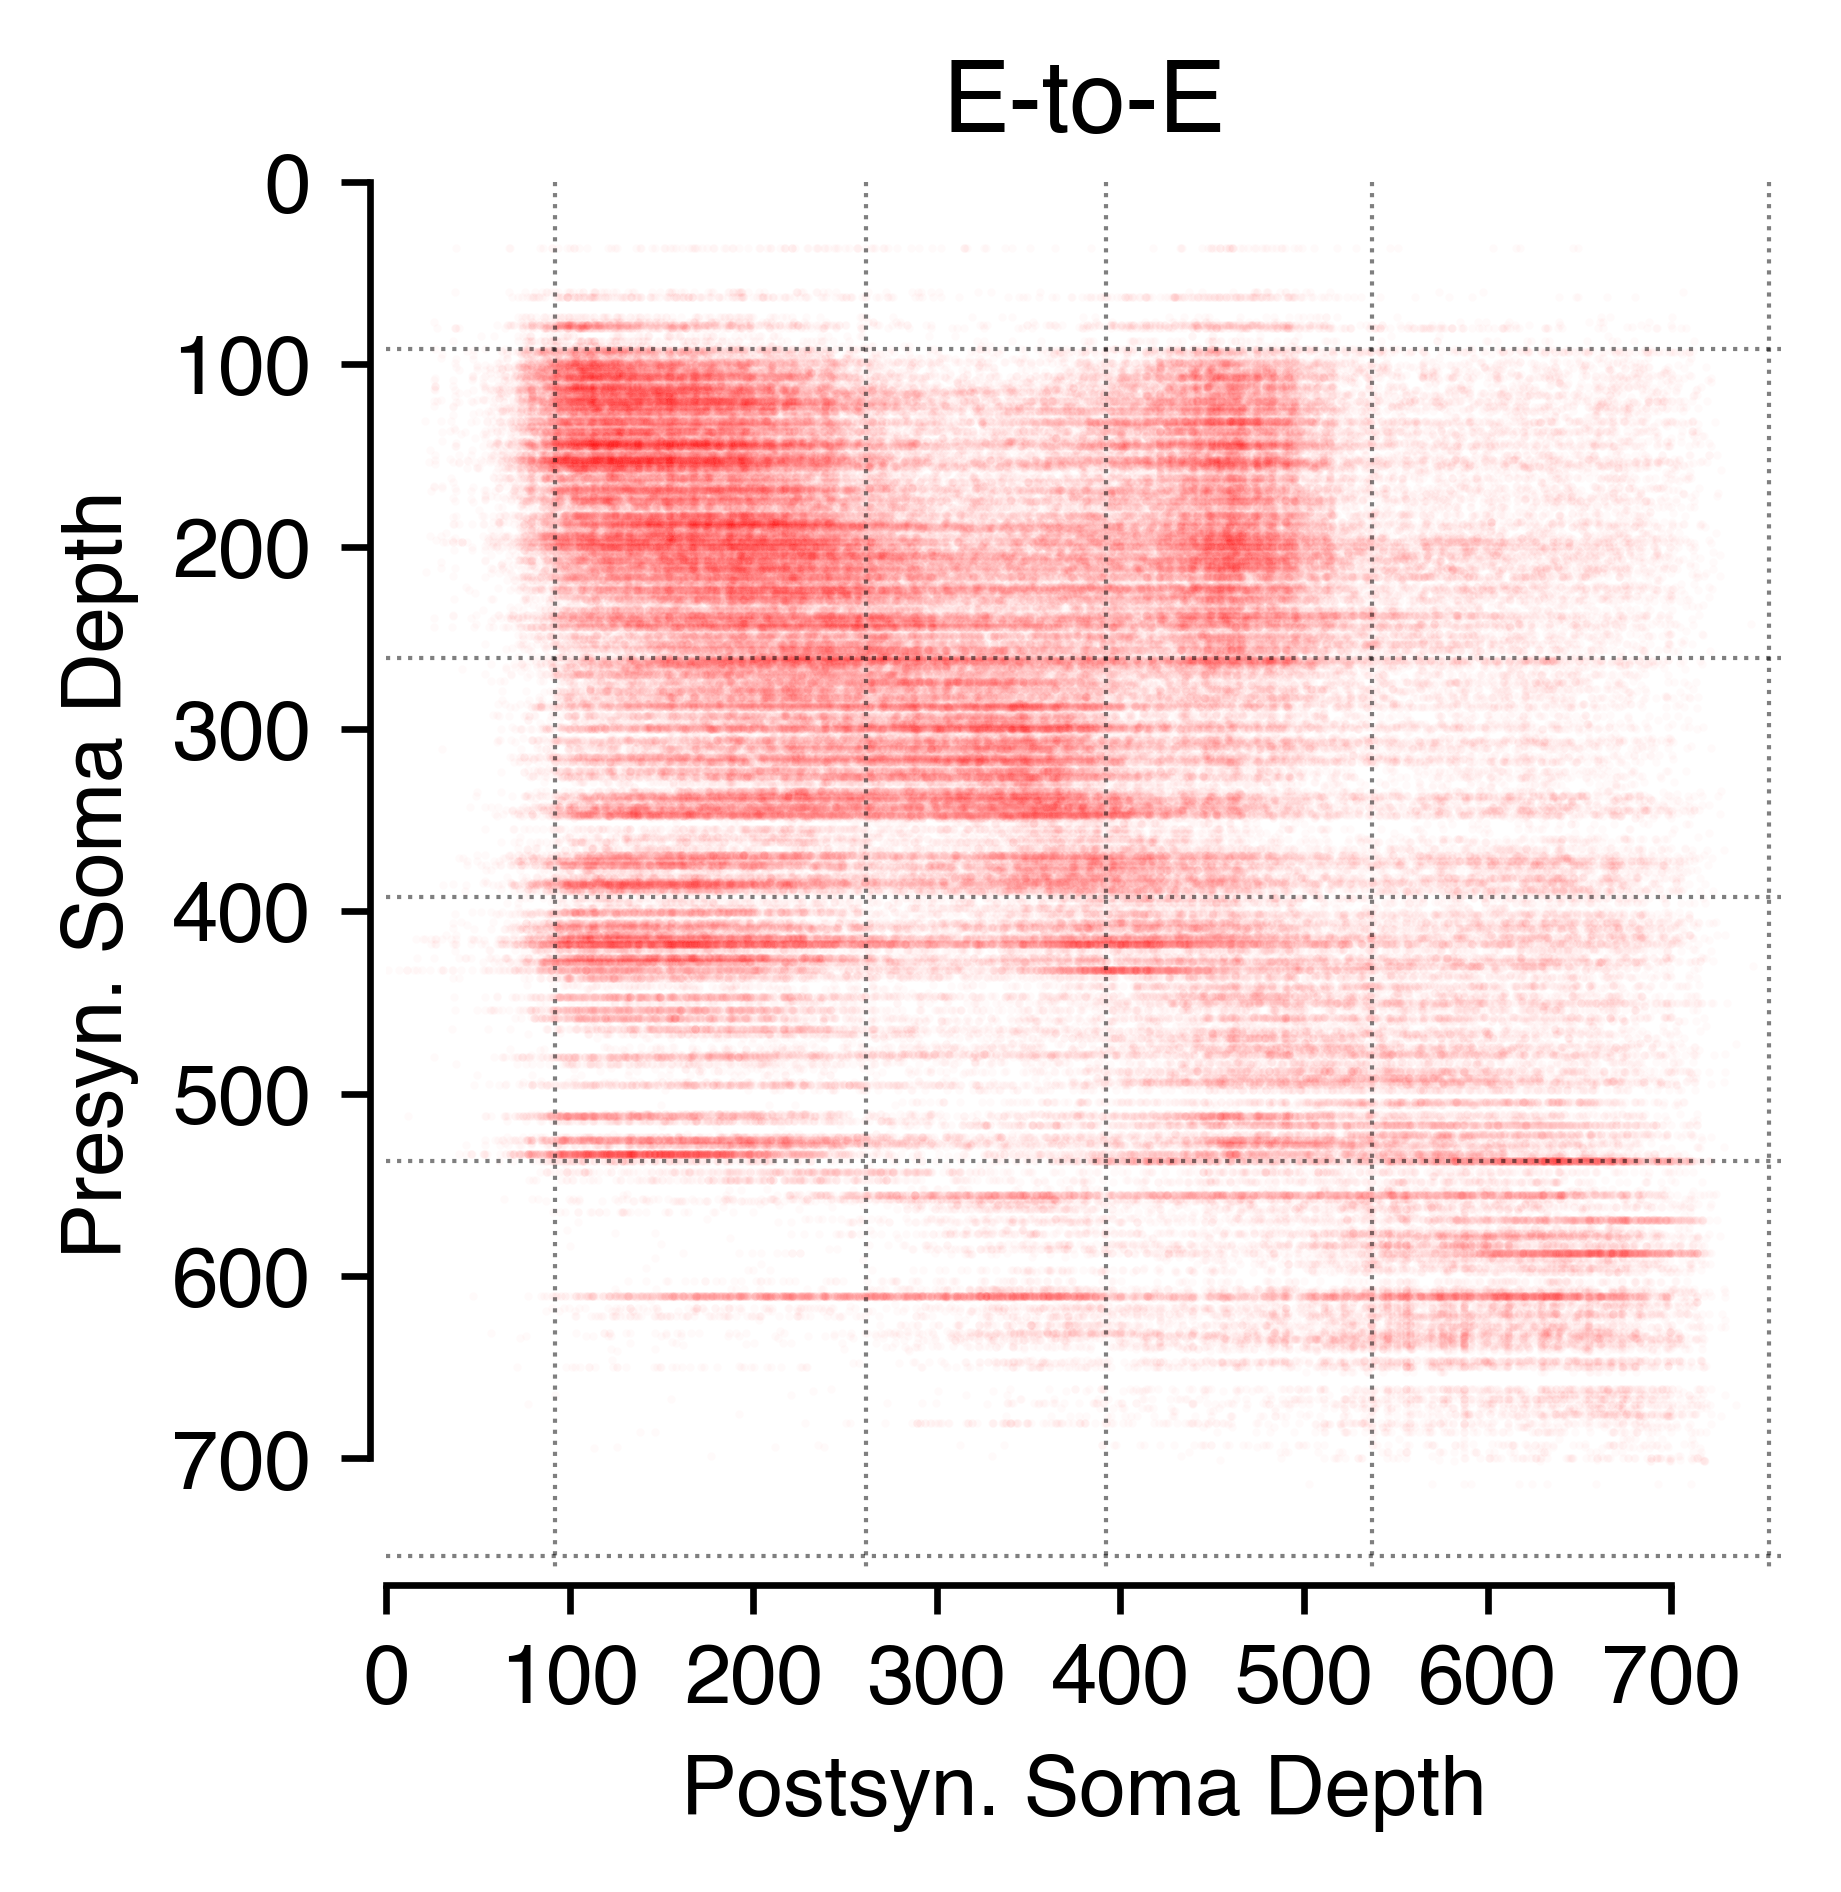

In [ ]:
fig, ax = plt.subplots(figsize=(3,3), dpi=600)

sns.scatterplot(
    x='soma_depth_post',
    y='soma_depth_pre',
    s=1,
    alpha=0.02,
    data=edgelist_typed.query('valence_pre == "excitatory_neuron" and valence_post == "excitatory_neuron"'),
    color='r',
    rasterized=True
)

ax.set_xlim(*height_bounds)
ax.set_ylim(*height_bounds[::-1])

ax.hlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=0.5, linestyle=':')
ax.vlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=0.5, linestyle=':')

ax.set_xticks(np.arange(0,701,100))

ax.set_title('E-to-E')
ax.set_ylabel('Presyn. Soma Depth')
ax.set_xlabel('Postsyn. Soma Depth')

sns.despine(ax=ax, offset=2, trim=True)

fig.savefig("soma_depth_connectivity_e_to_e_update.pdf", bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


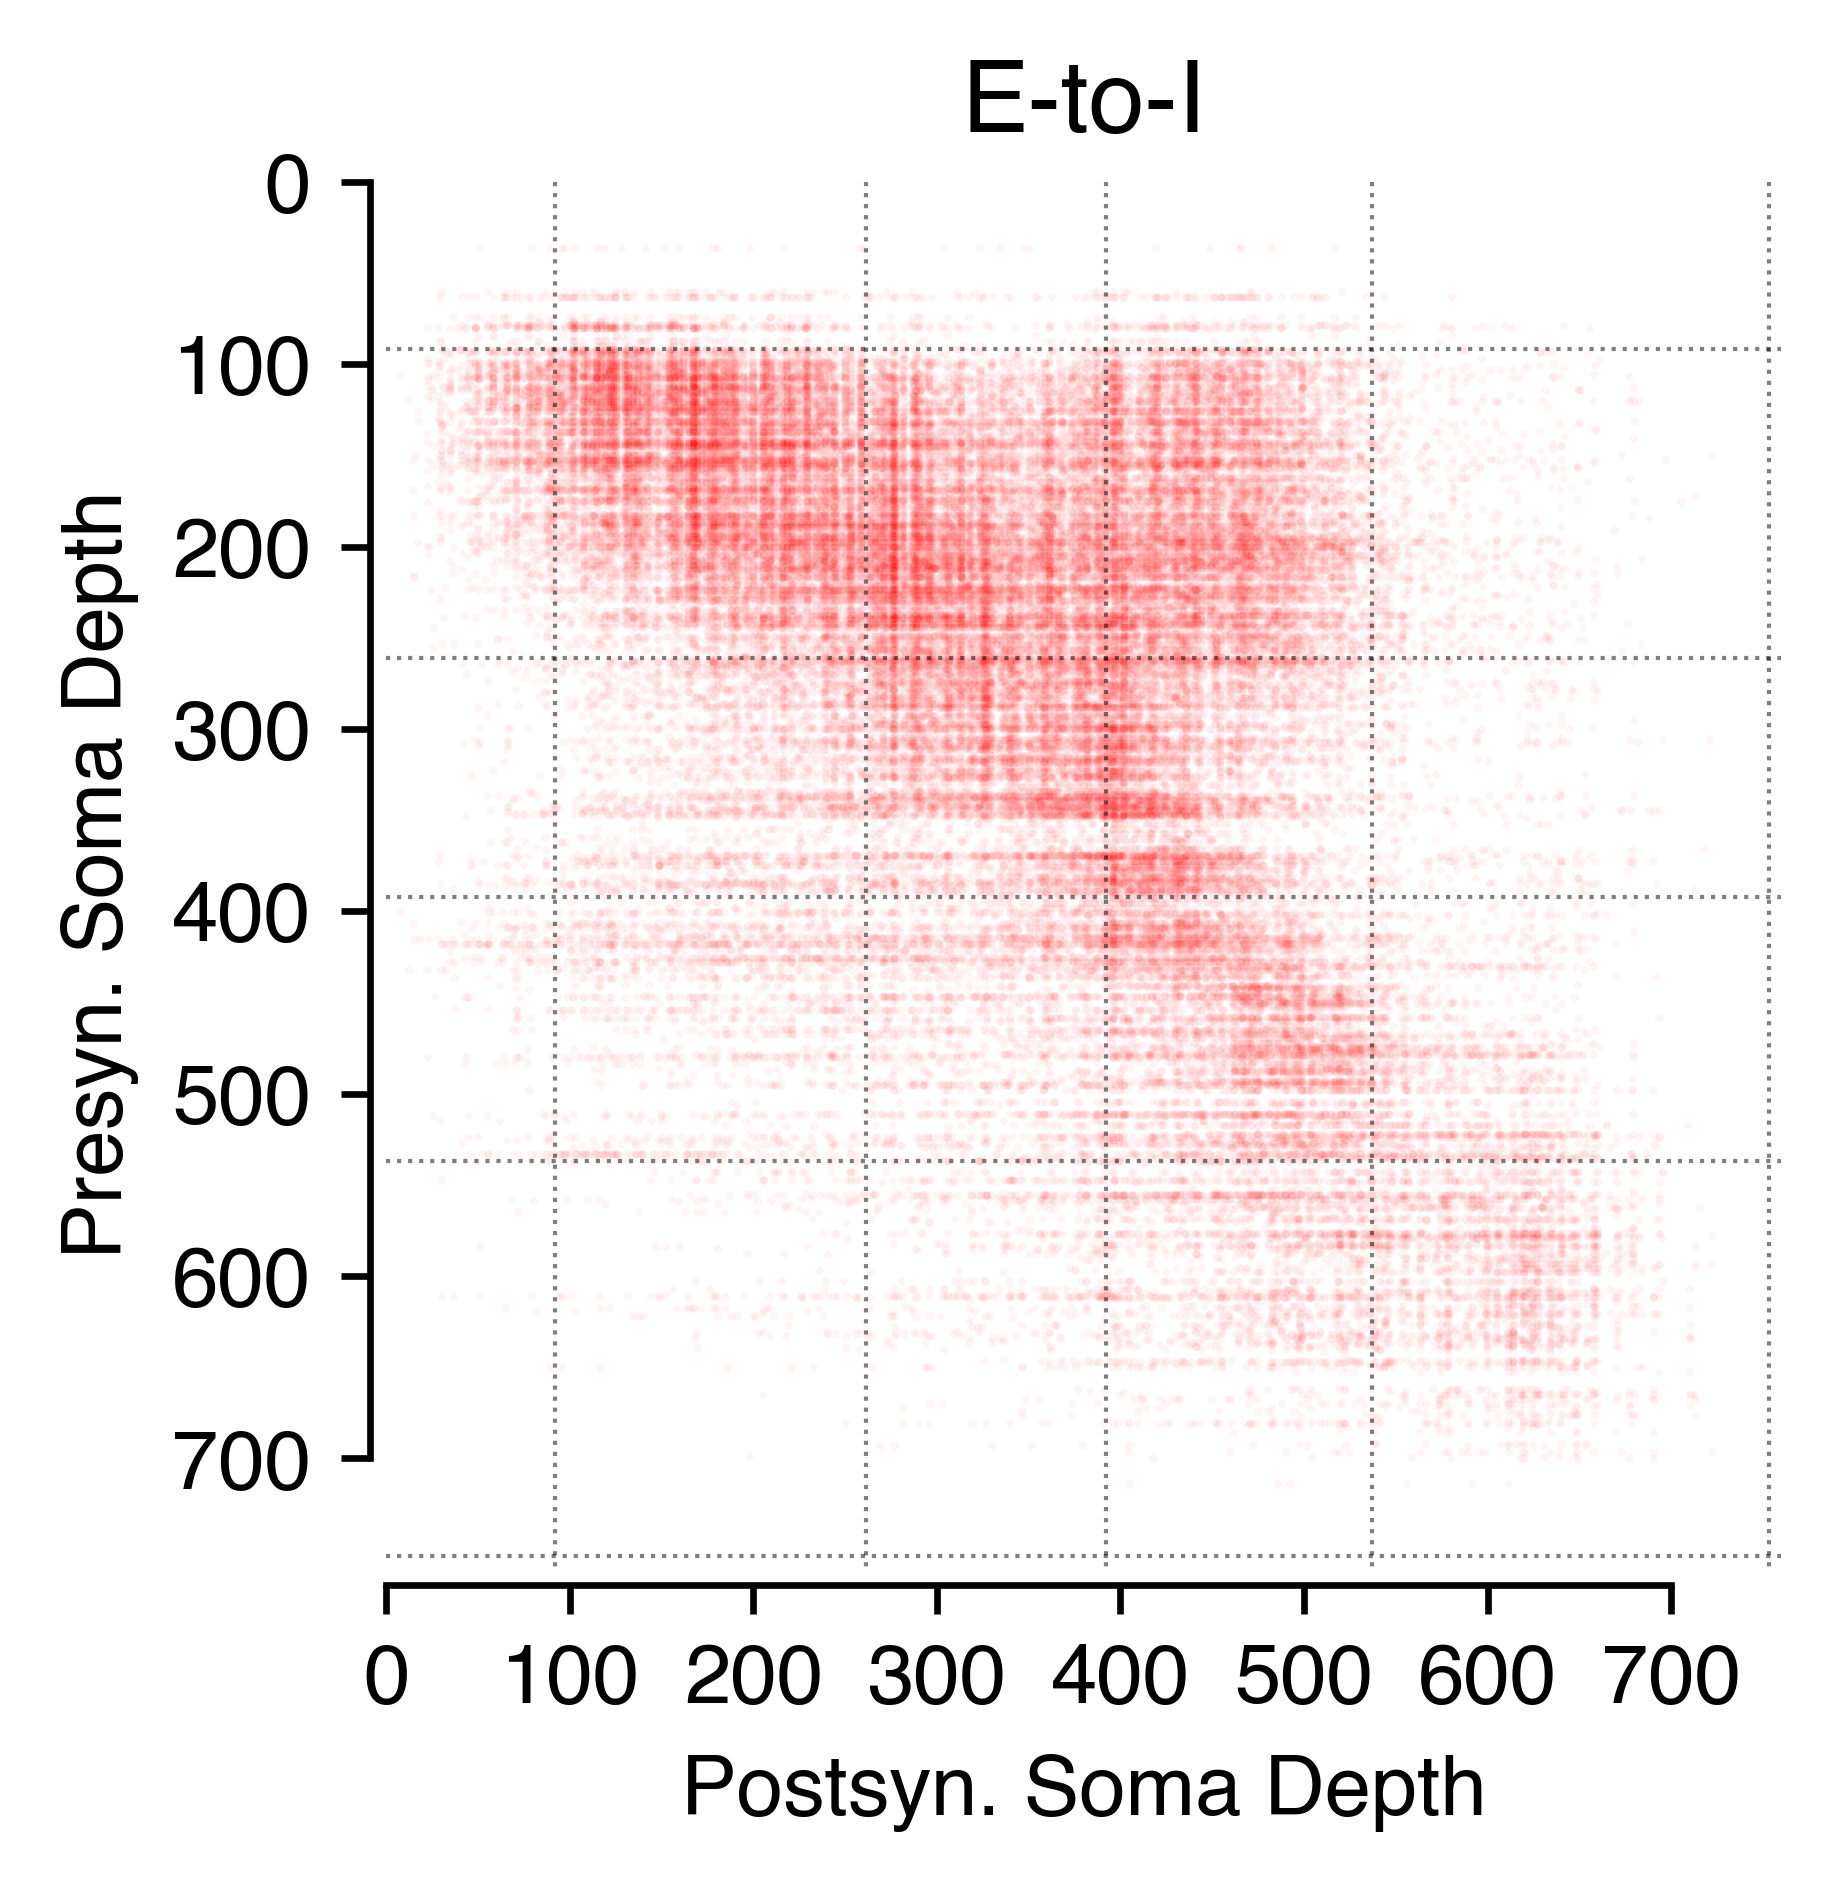

In [ ]:
fig, ax = plt.subplots(figsize=(3,3), dpi=600)

sns.scatterplot(
    x='soma_depth_post',
    y='soma_depth_pre',
    s=1,
    alpha=0.04,
    data=edgelist_typed.query('valence_pre == "excitatory_neuron" and valence_post == "inhibitory_neuron"'),
    color='r',
    rasterized=True
)

ax.set_xlim(*height_bounds)
ax.set_ylim(*height_bounds[::-1])

ax.hlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=0.5, linestyle=':')
ax.vlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=0.5, linestyle=':')

ax.set_xticks(np.arange(0,701,100))

ax.set_title('E-to-I')
ax.set_ylabel('Presyn. Soma Depth')
ax.set_xlabel('Postsyn. Soma Depth')

sns.despine(ax=ax, offset=2, trim=True)

fig.savefig("soma_depth_connectivity_e_to_i_update.pdf", bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


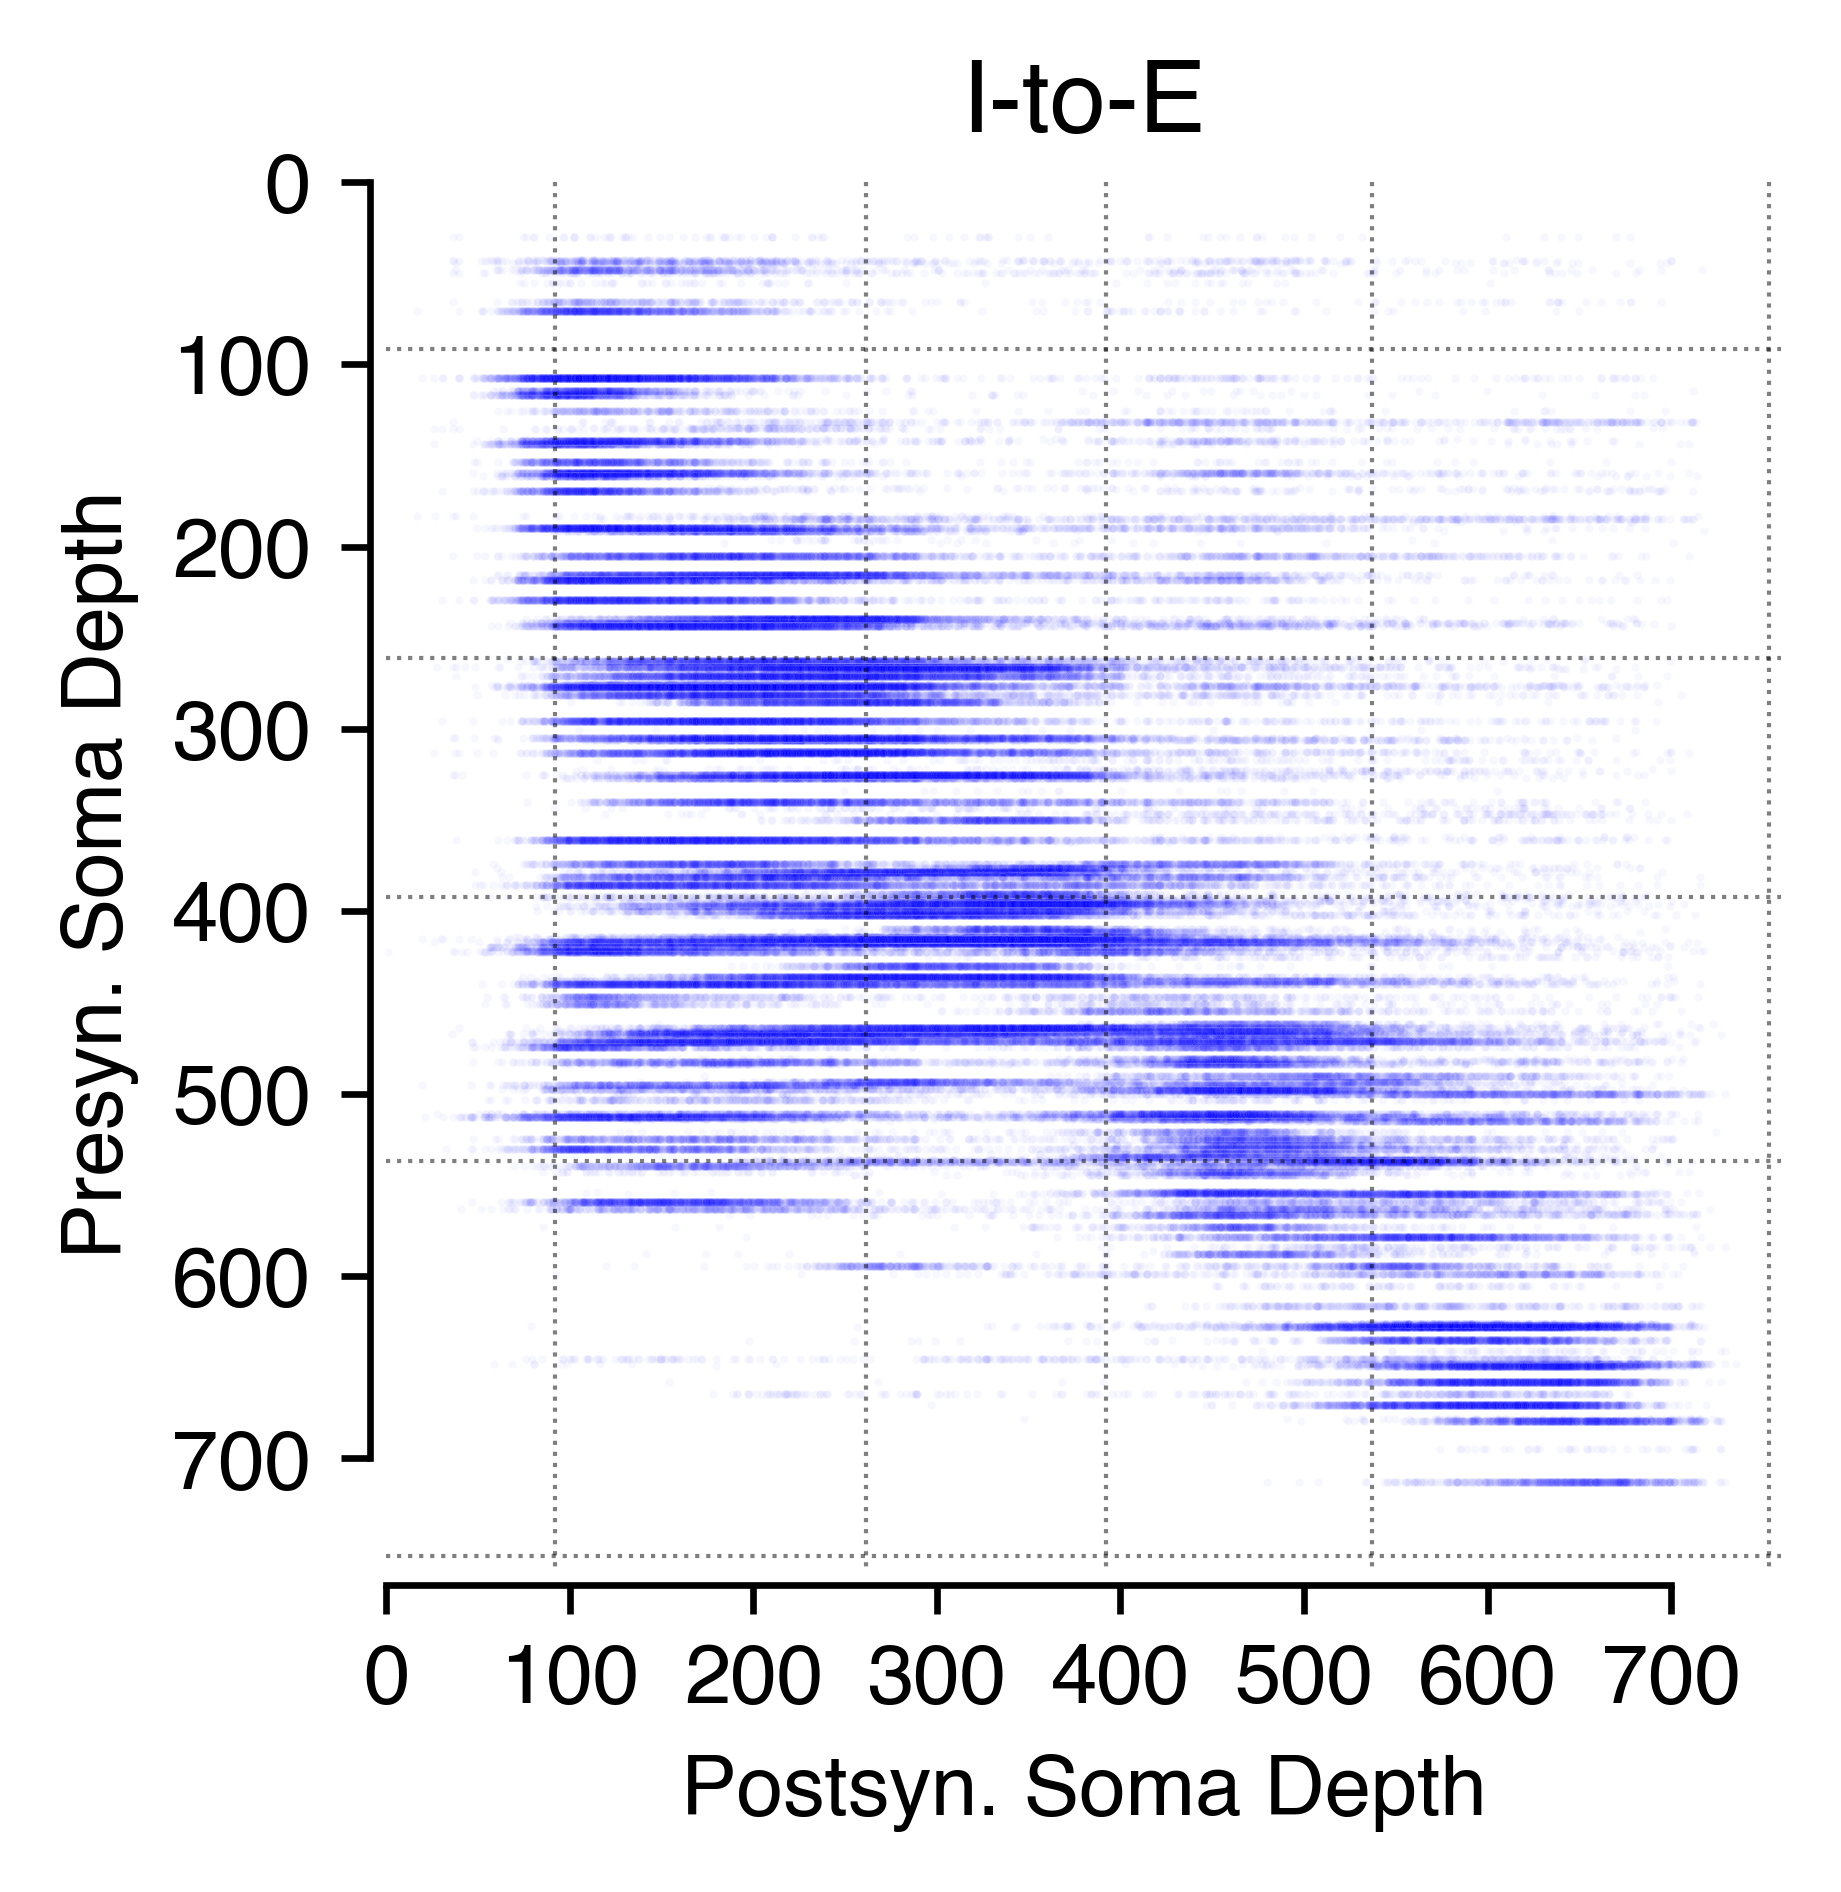

In [ ]:
fig, ax = plt.subplots(figsize=(3,3), dpi=600)

sns.scatterplot(
    x='soma_depth_post',
    y='soma_depth_pre',
    s=1,
    alpha=0.03,
    data=edgelist_typed.query('valence_pre == "inhibitory_neuron" and valence_post == "excitatory_neuron"'),
    color='b',
    rasterized=True
)

ax.set_xlim(*height_bounds)
ax.set_ylim(*height_bounds[::-1])

ax.hlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=0.5, linestyle=':')
ax.vlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=0.5, linestyle=':')

ax.set_xticks(np.arange(0,701,100))

ax.set_title('I-to-E')
ax.set_ylabel('Presyn. Soma Depth')
ax.set_xlabel('Postsyn. Soma Depth')

sns.despine(ax=ax, offset=2, trim=True)

fig.savefig("soma_depth_connectivity_i_to_e_update.pdf", bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


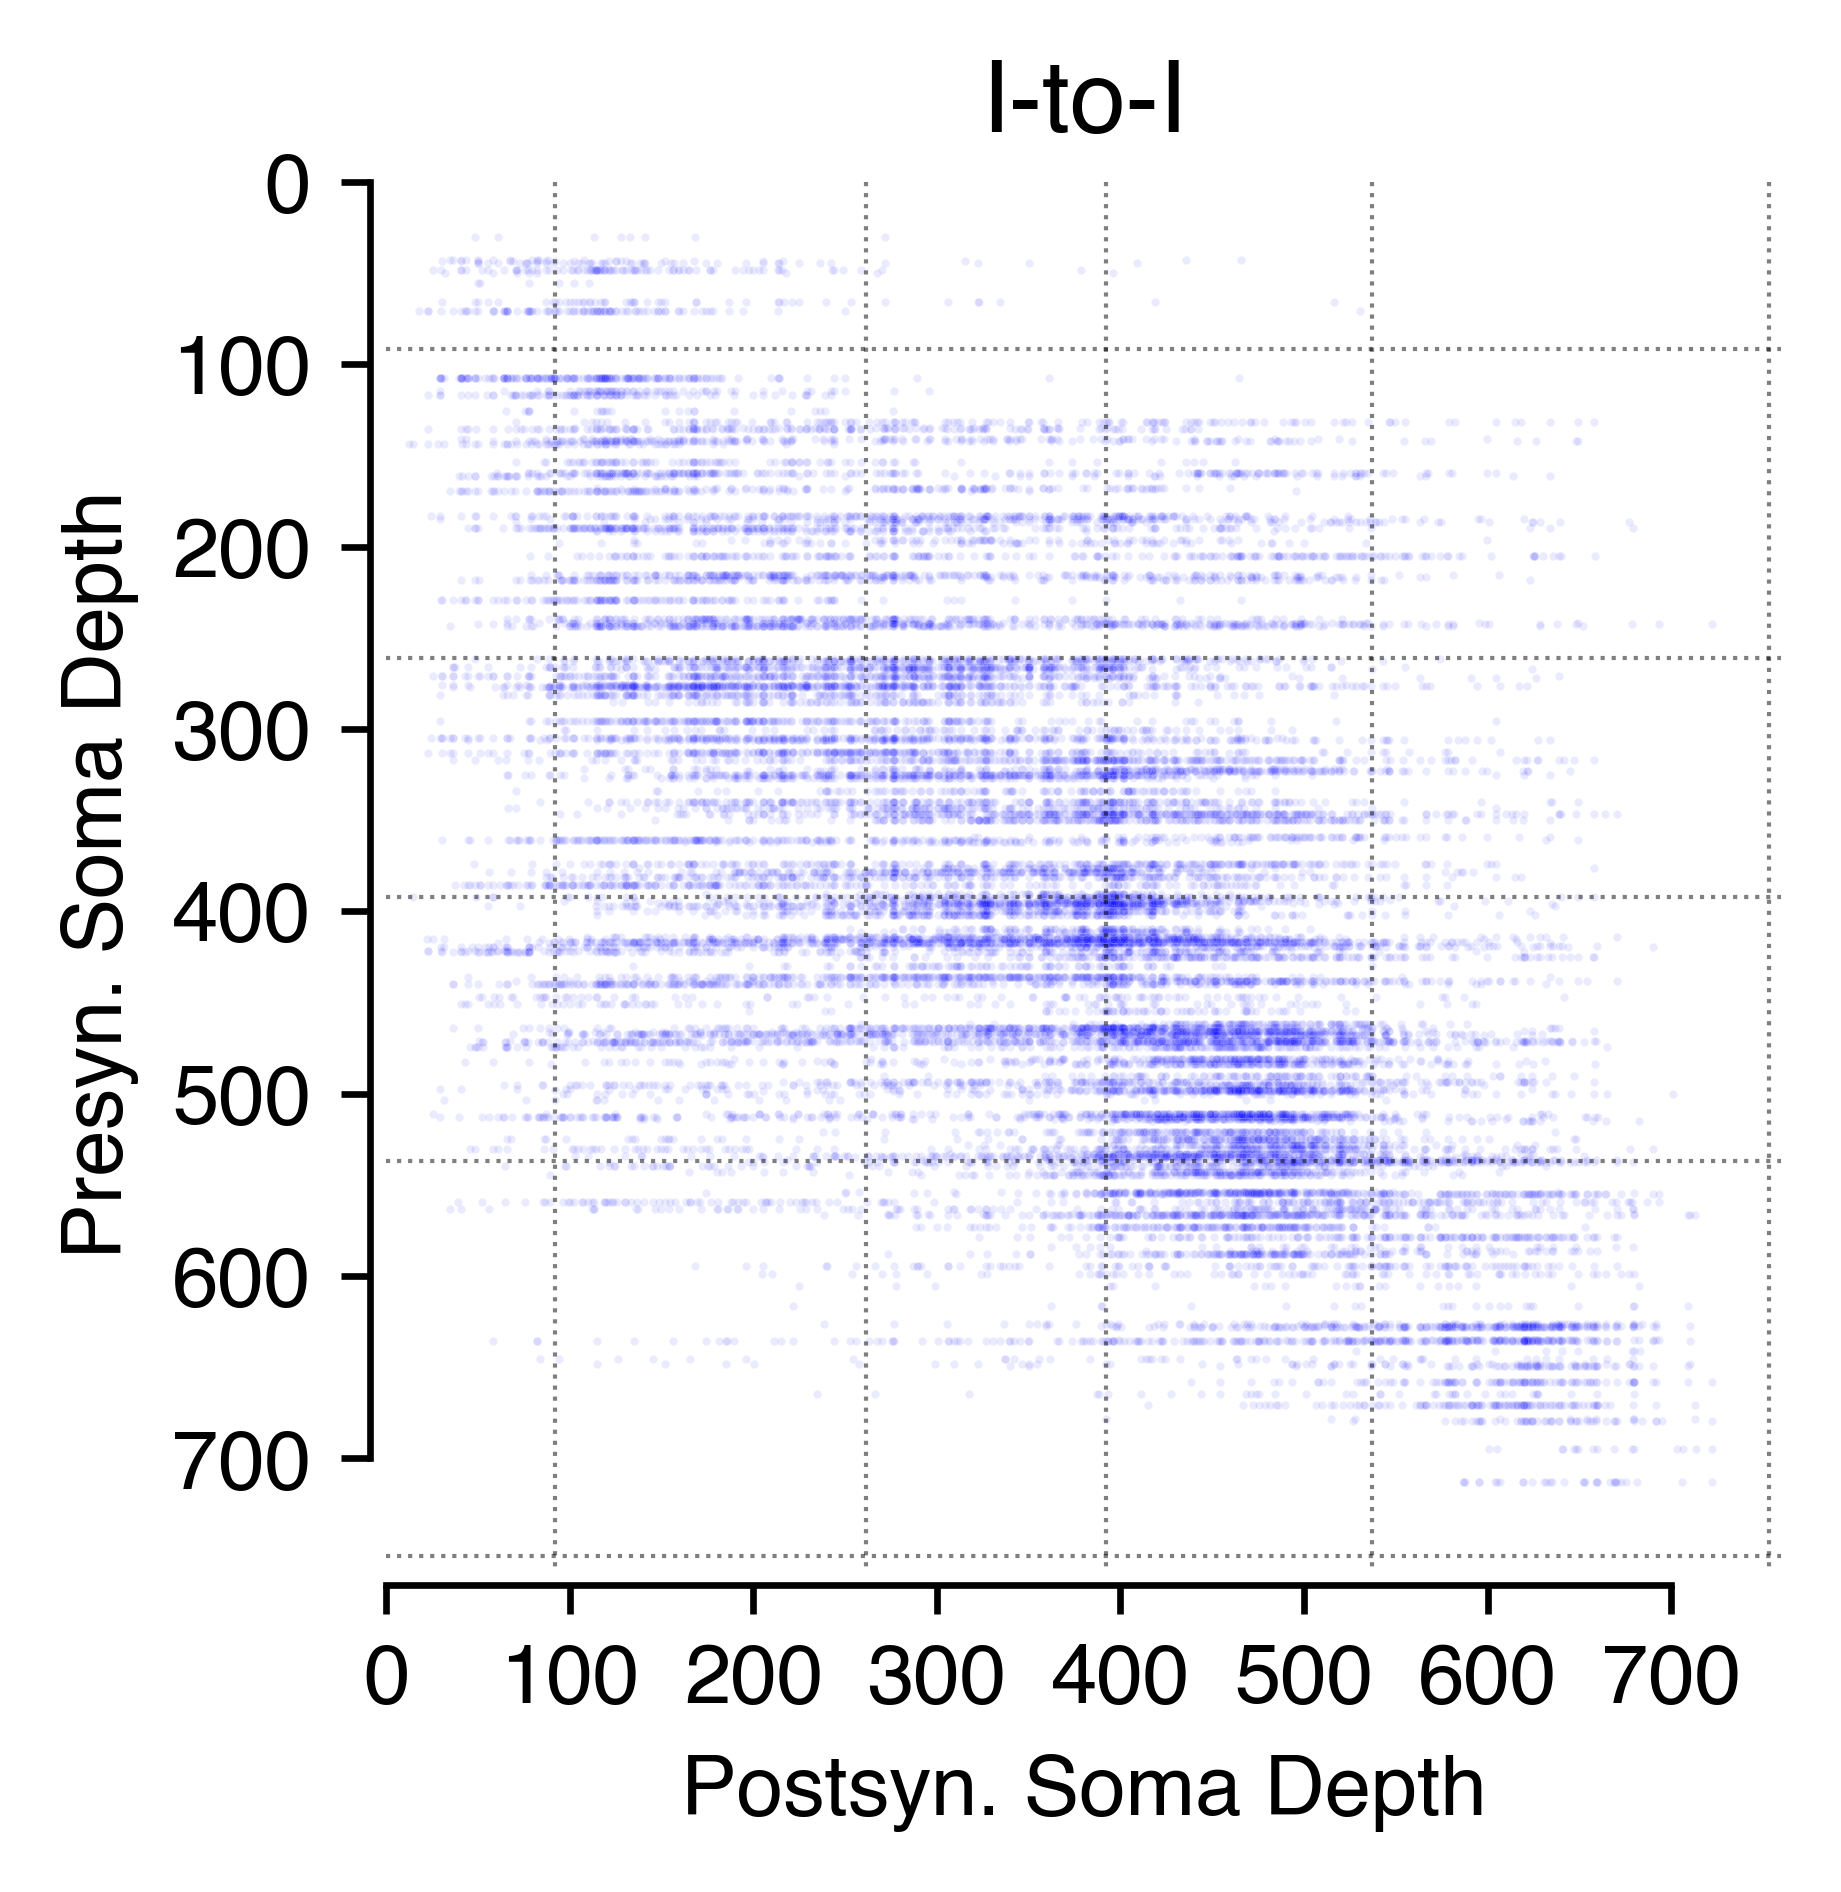

In [ ]:
fig, ax = plt.subplots(figsize=(3,3), dpi=600)

sns.scatterplot(
    x='soma_depth_post',
    y='soma_depth_pre',
    s=1,
    alpha=0.08,
    data=edgelist_typed.query('valence_pre == "inhibitory_neuron" and valence_post == "inhibitory_neuron"'),
    color='b',
    rasterized=True
)

ax.set_xlim(*height_bounds)
ax.set_ylim(*height_bounds[::-1])

ax.hlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=0.5, linestyle=':')
ax.vlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=0.5, linestyle=':')

ax.set_xticks(np.arange(0,701,100))

ax.set_title('I-to-I')
ax.set_ylabel('Presyn. Soma Depth')
ax.set_xlabel('Postsyn. Soma Depth')

sns.despine(ax=ax, offset=2, trim=True)

fig.savefig("soma_depth_connectivity_i_to_i_update.pdf", bbox_inches='tight')